In [2]:
import pandas as pd
import  matplotlib.pyplot as plt
df_titanic = pd.read_csv('./Downloads/train.csv')

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)
print(df_titanic.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S


In [5]:
df_titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df_titanic.drop(['Cabin'],axis=1,inplace=True)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df_titanic['Age'].fillna(df_titanic['Age'].mean(),inplace=True)
df_titanic.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26216\3961691629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].mean(),inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df_titanic["Family_members"]=df_titanic["Pclass"]+df_titanic["SibSp"]
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members
0,0,3,male,22.000000,1,0,7.2500,S,4
1,1,1,female,38.000000,1,0,71.2833,C,2
2,1,3,female,26.000000,0,0,7.9250,S,3
3,1,1,female,35.000000,1,0,53.1000,S,2
4,0,3,male,35.000000,0,0,8.0500,S,3
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,2
887,1,1,female,19.000000,0,0,30.0000,S,1
888,0,3,female,29.699118,1,2,23.4500,S,4
889,1,1,male,26.000000,0,0,30.0000,C,1


In [10]:
#Normalize of data
X=df_titanic[['Age','Fare','Family_members']]
X=X.apply(lambda x:((x-x.min())/(x.max()-x.min())),axis=0)
df_titanic[['Age','Fare','Family_members']]=X
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members
0,0,3,male,0.271174,1,0,0.014151,S,0.3
1,1,1,female,0.472229,1,0,0.139136,C,0.1
2,1,3,female,0.321438,0,0,0.015469,S,0.2
3,1,1,female,0.434531,1,0,0.103644,S,0.1
4,0,3,male,0.434531,0,0,0.015713,S,0.2
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,0.025374,S,0.1
887,1,1,female,0.233476,0,0,0.058556,S,0.0
888,0,3,female,0.367921,1,2,0.045771,S,0.3
889,1,1,male,0.321438,0,0,0.058556,C,0.0


In [11]:
df_titanic = pd.get_dummies(data=df_titanic, columns=['Pclass','Sex','Embarked'])
df_titanic

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.3,False,False,True,False,True,False,False,True
1,1,0.472229,1,0,0.139136,0.1,True,False,False,True,False,True,False,False
2,1,0.321438,0,0,0.015469,0.2,False,False,True,True,False,False,False,True
3,1,0.434531,1,0,0.103644,0.1,True,False,False,True,False,False,False,True
4,0,0.434531,0,0,0.015713,0.2,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0.1,False,True,False,False,True,False,False,True
887,1,0.233476,0,0,0.058556,0.0,True,False,False,True,False,False,False,True
888,0,0.367921,1,2,0.045771,0.3,False,False,True,True,False,False,False,True
889,1,0.321438,0,0,0.058556,0.0,True,False,False,False,True,True,False,False


In [12]:
y_label=df_titanic['Survived']
print(y_label)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [13]:
df_titanic.drop(['Survived'],axis=1,inplace=True)
df_titanic.head()

,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,1,0,0.014151,0.3,False,False,True,False,True,False,False,True
1,0.472229,1,0,0.139136,0.1,True,False,False,True,False,True,False,False
2,0.321438,0,0,0.015469,0.2,False,False,True,True,False,False,False,True
3,0.434531,1,0,0.103644,0.1,True,False,False,True,False,False,False,True
4,0.434531,0,0,0.015713,0.2,False,False,True,False,True,False,False,True


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_titanic,y_label,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#When you split your data into training and testing sets, you usually split X and y separately. This is because you need both the features (X_train) and target labels (y_train) in the training phase to fit the model, and you need the features (X_test) and the target labels (y_test) in the testing phase to evaluate the model's performance.

(623, 13)
(268, 13)
(623,)
(268,)


In [15]:
#Fitting model and clculating accuracy
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train,y_train)
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

0.9807383627608347
0.7425373134328358


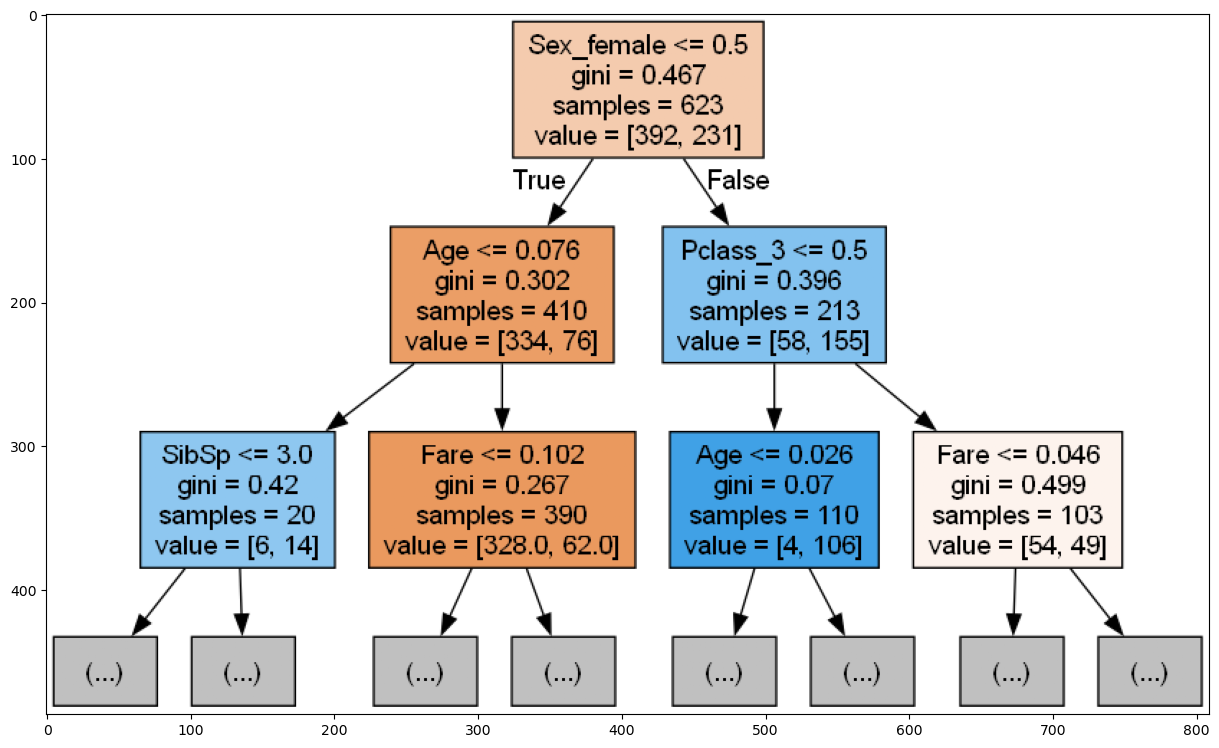

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

# Export the decision tree to a .dot file
decision_tree = tree.export_graphviz(
    dt_model,
    out_file='tree.dot',
    feature_names=X_train.columns,
    max_depth=2,
    filled=True
)

# Manually run the `dot` command to generate the PNG file
!dot -Tpng tree.dot -o tree.png

# Read and display the generated image
image = plt.imread('tree.png')
plt.figure(figsize=(15, 15))
plt.imshow(image)
# plt.axis("off")  # Hide the axes for better visualization
plt.show()


In [17]:
#in binary variables usually split is at 0.5 so <=0.5 is 1st and second class for P_class and oter is for third class

In [18]:
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

0.9807383627608347
0.7425373134328358


In [19]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [20]:
print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.7961476725521669
0.7835820895522388


In [21]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9807383627608347
0.7835820895522388


In [23]:
df_titanic

,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,1,0,0.014151,0.3,False,False,True,False,True,False,False,True
1,0.472229,1,0,0.139136,0.1,True,False,False,True,False,True,False,False
2,0.321438,0,0,0.015469,0.2,False,False,True,True,False,False,False,True
3,0.434531,1,0,0.103644,0.1,True,False,False,True,False,False,False,True
4,0.434531,0,0,0.015713,0.2,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0,0,0.025374,0.1,False,True,False,False,True,False,False,True
887,0.233476,0,0,0.058556,0.0,True,False,False,True,False,False,False,True
888,0.367921,1,2,0.045771,0.3,False,False,True,True,False,False,False,True
889,0.321438,0,0,0.058556,0.0,True,False,False,False,True,True,False,False


In [24]:
new_passengers = pd.DataFrame({
    'Age': [0.25, 0.45, 0.30, 0.20, 0.40, 0.28, 0.18, 0.35, 0.26, 0.32],
    'SibSp': [0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    'Parch': [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    'Fare': [0.015, 0.14, 0.02, 0.008, 0.05, 0.01, 0.005, 0.1, 0.03, 0.02],
    'Family_members': [0.1, 0.2, 0.1, 0.2, 0.1, 0.3, 0.2, 0.1, 0.1, 0.2],
    'Pclass_1': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
    'Pclass_2': [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    'Pclass_3': [1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
    'Sex_female': [0, 1, 0, 1, 1, 0, 0, 1, 0, 1],
    'Sex_male': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0],
    'Embarked_C': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
    'Embarked_Q': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    'Embarked_S': [1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
})

# Make predictions
predictions = rf.predict(new_passengers)
print("Predictions for the 10 passengers:", predictions)

Predictions for the 10 passengers: [0 1 0 1 1 0 0 1 0 1]


In [35]:
# number of trees in random forest
n_estimators = [10,20,30,40,50,60,70,80]
# number of features to consider at every split
max_features=['sqrt', 'log2']
max_depth = [2,4]
# min number of samples required to split the node
min_samples_split = [2,5]
# min number of samples required at each leaf node
min_samples_leaf = [1,2]
# method of selecting sample for each tree
bootstrap = [True, False]

grid = {
    'n_estimators': n_estimators ,#number of base models created,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid, cv=3, n_jobs=-1)
#estimator uses algorithm used
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80]})

In [37]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 60}

In [38]:
rf_grid.score(X_train,y_train)

0.841091492776886

In [39]:
rf_grid.score(X_test,y_test)

0.8134328358208955

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
model_adaboost=AdaBoostClassifier()
model_adaboost.fit(X_train,y_train)
model_adaboost.score(X_test,y_test)


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7985074626865671

In [41]:
cv_score=cross_val_score(model_adaboost,X_train,y_train,cv=3)
cv_score

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([0.80769231, 0.79326923, 0.80193237])

In [42]:
cv_score.mean()

0.8009646352037656

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(dt_model, n_estimators = 50, max_samples = 0.5, max_features = 0.5)
bc = bc.fit(X_train, y_train)
print(bc.score(X_train,y_train))
print(bc.score(X_test,y_test))

0.913322632423756
0.8097014925373134


In [44]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
ccp_alphas = dt_model.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]
ccp_grid_alpha_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    scoring=make_scorer(accuracy_score),
    param_grid={"ccp_alpha": ccp_alphas}, 
    cv=5  
)


ccp_grid_alpha_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.00000000e+00, 0.00000000e+00, 6.68806849e-05, 7.64350684e-05,
       7.64350684e-05, 1.01913425e-04, 1.22296109e-04, 4.19524296e-04,
       4.84088767e-04, 5.35045479e-04, 5.35045479e-04, 5.35045479e-04,
       6.01926164e-04, 6.42054575e-04, 7.93013835e-04, 8.56072766e-04,
       9.36329588e-04, 9.63081862e...
       2.18476904e-03, 2.33474391e-03, 2.40770465e-03, 2.40770465e-03,
       2.47630023e-03, 2.56821830e-03, 2.75005027e-03, 2.75166246e-03,
       2.77097237e-03, 2.80169269e-03, 2.85350913e-03, 2.92364137e-03,
       3.53501876e-03, 4.31143743e-03, 5.89430692e-03, 7.42480368e-03,
       1.07314836e-02, 1.23619849e-02, 1.78767428e-02, 4.06507445e-02,
       1.32358095e-01])},
             scoring=make_scorer(accuracy_score, response_method='predict'))

In [45]:
# Imagine you’re building a treehouse, but you don’t want it too big (too many branches) or too small (too few branches). You want it just right.

# - **`scoring=make_scorer(accuracy_score)`**: This is like checking how strong the treehouse is after each change. Stronger is better!

# - **`param_grid={"ccp_alpha": ccp_alphas}`**: These are the different ways to trim the tree to make it "just right." We test all these ways to find the best one.

# Together, they help us decide how much of the tree to keep so the treehouse is perfect—not too messy, not too bare! 😊

In [46]:
best_ccp_alpha_tree = ccp_grid_alpha_search.best_estimator_

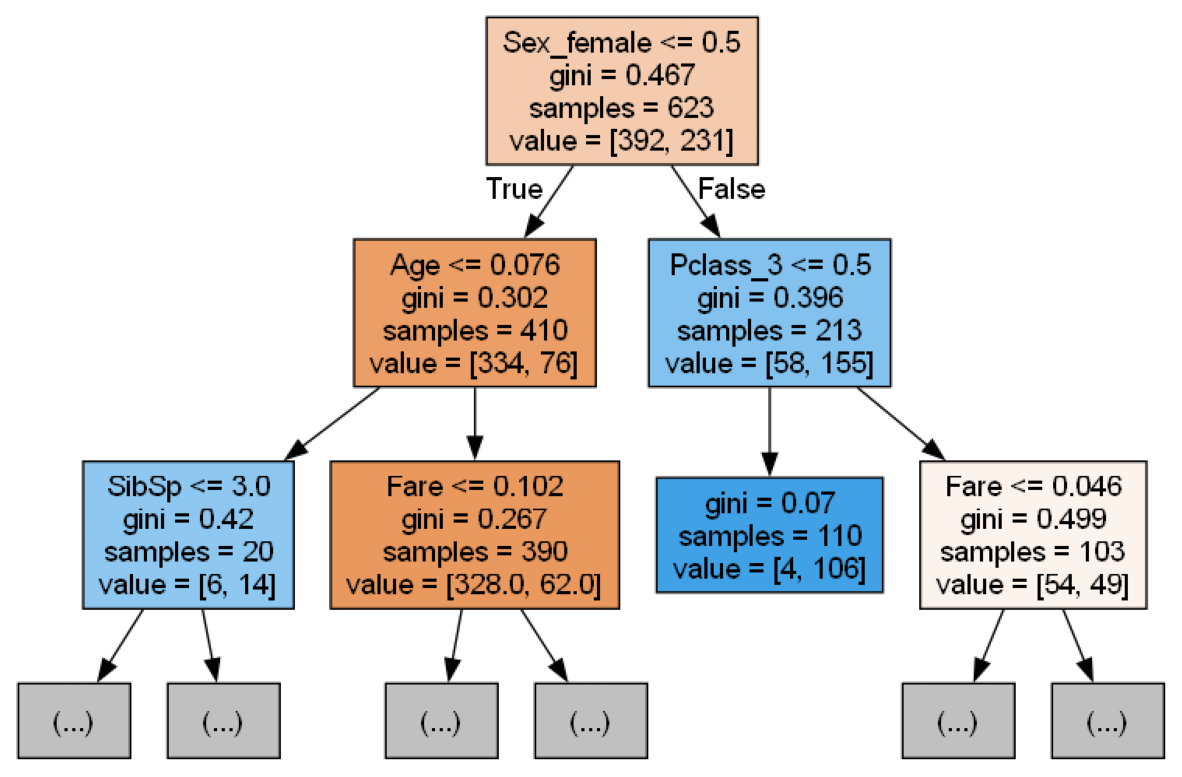

In [47]:
best_decision_tree = tree.export_graphviz(best_ccp_alpha_tree, out_file='best_tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng best_tree.dot -o best_tree.png
image = plt.imread('best_tree.png')
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis('off')
plt.show()